In [188]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


In [178]:
test = pandas.read_csv("data/nba_teste.csv")
train = pandas.read_csv("data/nba_treino.csv")

In [179]:
train_X = train.drop(['TARGET_5Yrs'], axis=1)
test_X = test.drop(['TARGET_5Yrs'], axis=1)

train_y = train['TARGET_5Yrs']
test_y = test['TARGET_5Yrs']

# Aprendizado supervisionado
## K Nearest Neighbors (KNN)
O KNN é um algoritmo ...


In [180]:
def knn(k, train, test):
    """
    Calculates the k nearest neighbors of a test sample in a train set.

    Parameters
    ----------
    k : int
        Number of neighbors to consider.
    train : numpy.ndarray
        Train set.
    test : numpy.ndarray
        Test sample.

    Returns
    -------
    numpy.ndarray
        Indices of the k nearest neighbors of test in train.
    """
    dist = np.sqrt(np.sum((train - test) ** 2, axis=1))  # Euclidean distance
    dist_sorted = np.argsort(dist)
    return dist_sorted[:k]

In [181]:
def classify_knn(k, train, test, train_y):
    """
    Classifies a test sample based on the k nearest neighbors in a train set.

    Parameters
    ----------
    k : int
        Number of neighbors to consider.
    train : numpy.ndarray
        Train set.
    test : numpy.ndarray
        Test sample.
    train_y : numpy.ndarray
        Labels of the train set.

    Returns
    -------
    list
        Classifications of the test samples.
    """
    neighbours = [knn(k, train, test.iloc[i]) for i in range(len(test_X))]
    predictions = [train_y[neighbours[i]] for i in range(len(neighbours))]
    return [scipy.stats.mode(predictions[i], keepdims=True)[0][0] for i in range(len(predictions))]


In [182]:
def obtain_metrics(predictions, test_y):
    """
    Calculates the accuracy, precision, recall and f1-score of a classification.

    Parameters
    ----------
    predictions : numpy.ndarray
        predictions of the test set.
    test_y : numpy.ndarray
        Labels of the test set.

    Returns
    -------
    tuple
        Accuracy, precision, recall and f1-score of the prediction.
    """
    tp = sum([tag == test == 1 for tag, test in zip(predictions, test_y)])
    tn = sum([tag == test == 0 for tag, test in zip(predictions, test_y)])
    fp = sum([1 for i in range(len(predictions)) if predictions[i] == 1 and test_y.iloc[i] == 0])
    fn = sum([1 for i in range(len(predictions)) if predictions[i] == 0 and test_y.iloc[i] == 1])
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    return accuracy, precision, recall, f1_score

In [183]:
def confusion_matrix(predictions, test_y):
    """
    Calculates the confusion matrix of a classification.

    Parameters
    ----------
    predictions : numpy.ndarray
        predictions of the test set.
    test_y : numpy.ndarray
        Labels of the test set.

    Returns
    -------
    tuple
        Accuracy, precision, recall and f1-score of the classification.
    """
    tp = sum([tag == test == 1 for tag, test in zip(predictions, test_y)])
    tn = sum([tag == test == 0 for tag, test in zip(predictions, test_y)])
    fp = sum([1 for i in range(len(predictions)) if predictions[i] == 1 and test_y.iloc[i] == 0])
    fn = sum([1 for i in range(len(predictions)) if predictions[i] == 0 and test_y.iloc[i] == 1])
    
    return pandas.DataFrame([[tp, fn], [fp, tn]], columns=['Target 5 Yrs(+)', 'Target 5 Yrs(-)'], index=['Target 5 Yrs(+)', 'Target 5 Yrs(-)'])

In [184]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in range(1, len(test) + 1):
    prediction = classify_knn(k, train_X, test_X, train_y)
    accuracy, precision, recall, f1_score = obtain_metrics(prediction, test_y)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)


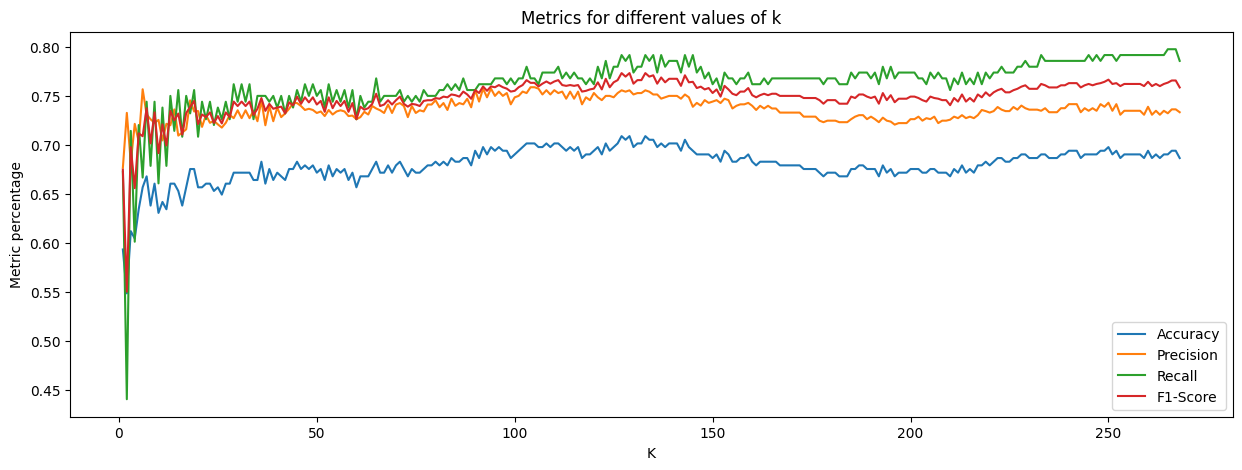

In [185]:
plt.figure(figsize=(15, 5))
plt.title('Metrics for different values of k')
plt.xlabel('K')
plt.ylabel('Metric percentage')
plt.plot(range(1, len(test) + 1), accuracies, label='Accuracy')
plt.plot(range(1, len(test) + 1), precisions, label='Precision')
plt.plot(range(1, len(test) + 1), recalls, label='Recall')
plt.plot(range(1, len(test) + 1), f1_scores, label='F1-Score')
plt.legend()
plt.show()

In [186]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
k_values = [2, 10, 50]

for k in k_values:
    print(f'========================== \n\nK = {k}\n')
    classification = classify_knn(k, train_X, test_X, train_y)
    accuracy, precision, recall, f1_score = obtain_metrics(classification, test_y)
    print(f"Accuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall},\nF1-Score: {f1_score}", end='\n\n')
    print(f"Confusion Matrix: \n{confusion_matrix(classification, test_y)}", end='\n\n')



K = 2

Accuracy: 0.5485074626865671,
Precision: 0.7326732673267327,
Recall: 0.44047619047619047,
F1-Score: 0.550185873605948

Confusion Matrix: 
                 Target 5 Yrs(+)  Target 5 Yrs(-)
Target 5 Yrs(+)               74               94
Target 5 Yrs(-)               27               73


K = 10

Accuracy: 0.6305970149253731,
Precision: 0.7254901960784313,
Recall: 0.6607142857142857,
F1-Score: 0.6915887850467289

Confusion Matrix: 
                 Target 5 Yrs(+)  Target 5 Yrs(-)
Target 5 Yrs(+)              111               57
Target 5 Yrs(-)               42               58


K = 50

Accuracy: 0.6716417910447762,
Precision: 0.7325581395348837,
Recall: 0.75,
F1-Score: 0.7411764705882353

Confusion Matrix: 
                 Target 5 Yrs(+)  Target 5 Yrs(-)
Target 5 Yrs(+)              126               42
Target 5 Yrs(-)               46               54



## Análise dos Resultados

## Extra - KNN com scikit-learn

In [187]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
k_values = [2, 10, 50]


for k in k_values:
    print(f'========================== \n\nK = {k}\n')
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(train_X, train_y)  # Train the KNN classifier using the train data
    predictions = knn.predict(test_X)  # Make predictions on the test data

    accuracy, precision, recall, f1_score = obtain_metrics(predictions, test_y)
    print(f"Accuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall},\nF1-Score: {f1_score}", end='\n\n')
    print(f"Confusion Matrix: \n{confusion_matrix(predictions, test_y)}", end='\n\n')




K = 2

Accuracy: 0.5522388059701493,
Precision: 0.7352941176470589,
Recall: 0.44642857142857145,
F1-Score: 0.5555555555555557

Confusion Matrix: 
                 Target 5 Yrs(+)  Target 5 Yrs(-)
Target 5 Yrs(+)               75               93
Target 5 Yrs(-)               27               73


K = 10

Accuracy: 0.6305970149253731,
Precision: 0.7254901960784313,
Recall: 0.6607142857142857,
F1-Score: 0.6915887850467289

Confusion Matrix: 
                 Target 5 Yrs(+)  Target 5 Yrs(-)
Target 5 Yrs(+)              111               57
Target 5 Yrs(-)               42               58


K = 50

Accuracy: 0.6716417910447762,
Precision: 0.7325581395348837,
Recall: 0.75,
F1-Score: 0.7411764705882353

Confusion Matrix: 
                 Target 5 Yrs(+)  Target 5 Yrs(-)
Target 5 Yrs(+)              126               42
Target 5 Yrs(-)               46               54



## Análise dos Resultados

# Aprendizado não supervisionado com K-means

In [397]:
class K_Means:
    def __init__(self, K, max_iter=300):
        self.K = K
        self.max_iter = max_iter

    def fit(self, X:pandas.DataFrame):
        """
        Fits the K-Means model to the data.

        Parameters
        ----------
        X : pandas DataFrame
            Data to fit the model.
        """
        # Initialize centroids randomly
        self.centroids = [X.iloc[index] for index in np.random.choice(X.shape[0], self.K, replace=False)]
        X = X.values

        for _ in range(self.max_iter):
            # Assign labels based on closest centroid
            distances = np.sqrt(((X[:, np.newaxis] - np.array(self.centroids)) ** 2).sum(axis=2))
            labels = np.argmin(distances, axis=1)

            # Find new centroids from means of points
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.K)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        """
        Predicts the labels of a dataset.

        Parameters
        ----------
        X : pandas DataFrame
            Data to predict the labels.

        Returns
        -------
        numpy.ndarray
            Labels of the data.
        """
        X = X.values
        distances = np.sqrt(((X[:, np.newaxis] - np.array(self.centroids)) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        return labels

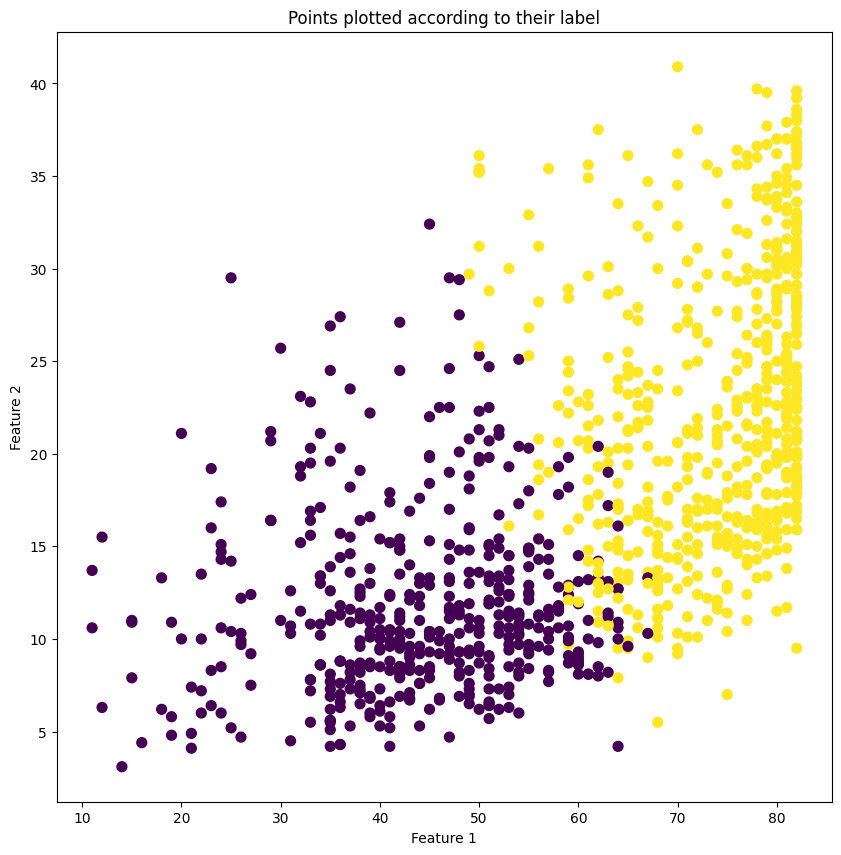

In [398]:
k_means = K_Means(2)
k_means.fit(train_X)
cluster_labels = k_means.predict(train_X)

plt.figure(figsize=(10, 10))
plt.scatter(train_X.iloc[:, 0], train_X.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Points plotted according to their label')
plt.show()


## Extra - K-Means com scikit-learn

/home/thiago/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 0 ... 1 1 1]


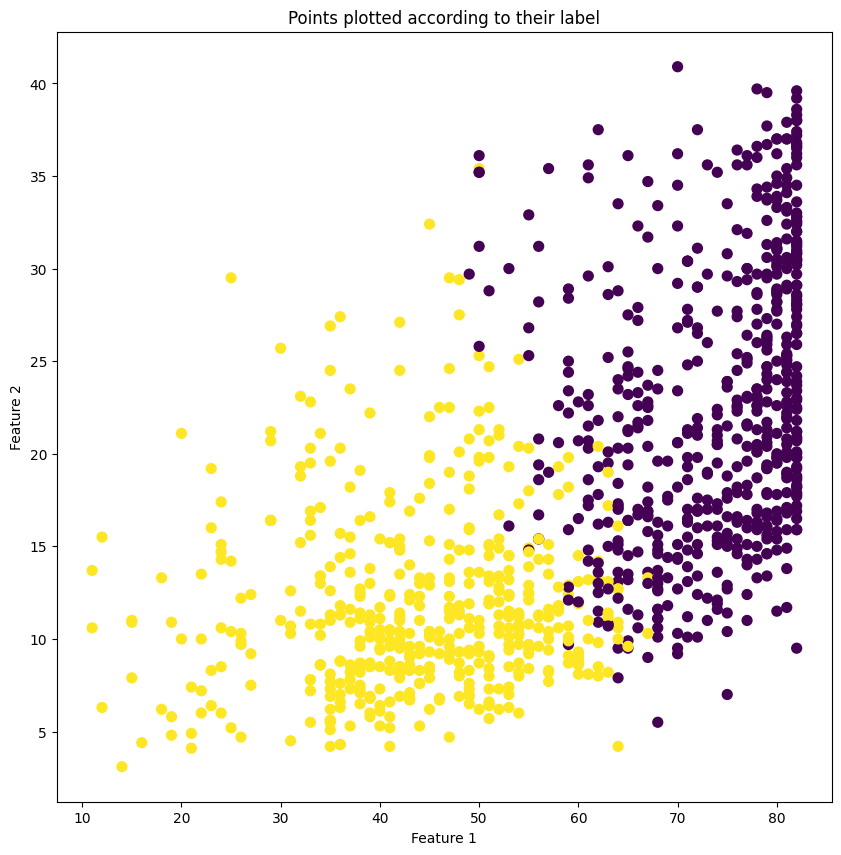

In [399]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(train_X)
cluster_labels = kmeans.predict(train_X)  # Predict the cluster labels for the data

print(cluster_labels)

plt.figure(figsize=(10, 10))
plt.scatter(train_X.iloc[:, 0], train_X.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Points plotted according to their label')
plt.show()
